# Trapezoid vs Gauss quadrature for periodic function

Let us compute
$$
\int_0^{2\pi} \exp(\sin x) dx
$$

    2     1.6717412138e+00     1.5277448438e+00
    4     2.8260084821e-04     2.0275305634e-01
    6     3.4594549447e-09     1.5148783594e-02
    8     7.1054273576e-15     1.2229354413e-03
   10     1.7763568394e-15     2.9323632519e-05
   12     1.7763568394e-15     3.4262054047e-06
   14     0.0000000000e+00     1.1795276755e-08
   16     2.6645352591e-15     4.7241393020e-09
   18     1.7763568394e-15     1.0296208330e-10
   20     8.8817841970e-16     2.8332891588e-12


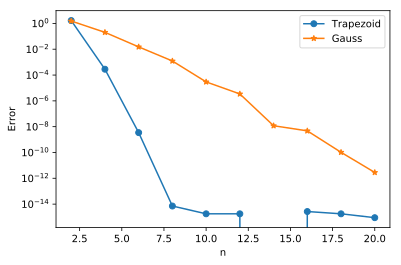

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy.integrate import fixed_quad,trapz
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.exp(np.sin(x))
a,b = 0.0,2*np.pi
qe = 7.954926521012844 # Exact integral

n,N = 2,10
e1,e2,nodes = np.zeros(N),np.zeros(N),np.zeros(N)
for i in range(N):
    x = np.linspace(a,b,n)
    val = trapz(f(x),dx=(b-a)/(n-1))
    e1[i] = np.abs(val - qe)
    val = fixed_quad(f,a,b,n=n)
    nodes[i] = n
    e2[i] = np.abs(val[0]-qe)
    print('%5d %20.10e %20.10e' % (n,e1[i],e2[i]))
    n = n+2

plt.figure()
plt.semilogy(nodes,e1,'o-')
plt.semilogy(nodes,e2,'*-')
plt.legend(('Trapezoid','Gauss'))
plt.xlabel('n')
plt.ylabel('Error');

Trapezoid error converges at exponential rate !!!